In [1]:
# Import the dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list

coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.

for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-20.817576749710014 152.87891727501
27.318672932440833 -40.98847280721591
-36.10930165095624 167.1324411451095
21.935540648469768 -69.24181183666319
-49.603404454437424 129.5701643533037
39.55109730157403 18.427898907251574
-8.979231820373371 -52.44457531559853
60.451861142700324 178.89685286443978
-25.530859408941822 -145.41034294057036
-7.878143332103363 72.7926304718286
-83.7059014773233 -175.00182989192513
-36.62140400408193 -114.73426299499147
41.02724002577099 -21.89176753259332
80.87417360780685 -28.582349452782438
-80.50719444694165 42.18097400856402
-87.74735327045106 102.08488665555745
-21.749531804727297 117.23024979259833
-21.48306137043059 129.0211535528959
-88.99677145500527 -0.11387015513471965
-23.40345833933297 -169.28408716360727
68.98086374379253 -46.5907585034621
87.64631032934224 34.96341057564308
66.84807199122054 65.66880099793121
49.79499968580541 -25.709501542798762
-21.23950441282159 40.84134230554136
49.75083852225376 -19.501391952316112
89.49506720116594 -12

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities

cities = []


# Identify the nearest city for each latitude and longitude combination

for coordinate in coordinates:
    
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    
    # If city is unique, add it to the cities list
    
    if city not in cities:
        
        cities.append(city)
        
        
# Print the city count to confirm sufficient count

len(cities)

620

In [7]:
# Import the requests library

import requests

In [8]:
# Import the API key

from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Import the time library and the datetime module from the datetime library 

import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.

city_data = []
record_count = 1
set_count = 1


# Print the beginning of the logging.

print("Beginning Data Retrieval     ")
print("-----------------------------")

# Loop through all the cities in the list.

for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

        
    # Create endpoint URL with each city.
    
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    
    record_count += 1

    # Run an API request for each of the cities.
    
    try:
        # Parse the JSON and retrieve data.
        
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
       
        # Append the city information into city_data list.
        
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    
    except:
        
        print("City not found. Skipping...")
        pass


# Indicate that Data Loading is complete.

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yeppoon
Processing Record 2 of Set 1 | ribeira grande
Processing Record 3 of Set 1 | ahipara
Processing Record 4 of Set 1 | cockburn town
Processing Record 5 of Set 1 | port lincoln
Processing Record 6 of Set 1 | tricase
Processing Record 7 of Set 1 | sao felix do xingu
Processing Record 8 of Set 1 | beringovskiy
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | hithadhoo
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | vila franca do campo
Processing Record 14 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | roebourne
Processing Record 18 of Set 1 | yulara
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | alofi
Processing Record 21 of Set 1 | ilulissat
Processing Record 22

Processing Record 44 of Set 4 | mahebourg
Processing Record 45 of Set 4 | faya
Processing Record 46 of Set 4 | amderma
City not found. Skipping...
Processing Record 47 of Set 4 | kuytun
Processing Record 48 of Set 4 | slantsy
Processing Record 49 of Set 4 | kalmunai
Processing Record 50 of Set 4 | del rio
Processing Record 1 of Set 5 | alyth
Processing Record 2 of Set 5 | seoul
Processing Record 3 of Set 5 | slave lake
Processing Record 4 of Set 5 | sabya
Processing Record 5 of Set 5 | zdvinsk
Processing Record 6 of Set 5 | saint-louis
Processing Record 7 of Set 5 | sisimiut
Processing Record 8 of Set 5 | airai
Processing Record 9 of Set 5 | lagunillas
Processing Record 10 of Set 5 | kiama
Processing Record 11 of Set 5 | neusiedl am see
Processing Record 12 of Set 5 | kailua
Processing Record 13 of Set 5 | saint george
Processing Record 14 of Set 5 | puerto de la cruz
Processing Record 15 of Set 5 | waipawa
Processing Record 16 of Set 5 | san cristobal
Processing Record 17 of Set 5 | s

Processing Record 36 of Set 8 | kupang
Processing Record 37 of Set 8 | margate
Processing Record 38 of Set 8 | mastic beach
Processing Record 39 of Set 8 | chapais
Processing Record 40 of Set 8 | krasnoselkup
Processing Record 41 of Set 8 | agirish
Processing Record 42 of Set 8 | fredericton
Processing Record 43 of Set 8 | cabo san lucas
Processing Record 44 of Set 8 | santa fe
Processing Record 45 of Set 8 | kirakira
Processing Record 46 of Set 8 | padang
Processing Record 47 of Set 8 | kenora
Processing Record 48 of Set 8 | ayodhya
Processing Record 49 of Set 8 | ghanzi
Processing Record 50 of Set 8 | aripuana
Processing Record 1 of Set 9 | waddan
Processing Record 2 of Set 9 | klaksvik
Processing Record 3 of Set 9 | codrington
Processing Record 4 of Set 9 | santa cruz
Processing Record 5 of Set 9 | datong
Processing Record 6 of Set 9 | tongzi
Processing Record 7 of Set 9 | zilair
Processing Record 8 of Set 9 | college
Processing Record 9 of Set 9 | weyburn
Processing Record 10 of Se

Processing Record 25 of Set 12 | maumere
Processing Record 26 of Set 12 | quelimane
Processing Record 27 of Set 12 | warqla
City not found. Skipping...
Processing Record 28 of Set 12 | kanye
Processing Record 29 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 30 of Set 12 | harper
Processing Record 31 of Set 12 | belmonte
Processing Record 32 of Set 12 | veinticinco de mayo
Processing Record 33 of Set 12 | oriximina
Processing Record 34 of Set 12 | the pas
Processing Record 35 of Set 12 | svetlogorsk
Processing Record 36 of Set 12 | saryg-sep
Processing Record 37 of Set 12 | kinablangan
Processing Record 38 of Set 12 | novyy urengoy
Processing Record 39 of Set 12 | lavrentiya
Processing Record 40 of Set 12 | abhar
Processing Record 41 of Set 12 | guantanamo
Processing Record 42 of Set 12 | manvi
Processing Record 43 of Set 12 | awbari
Processing Record 44 of Set 12 | pokanayevka
City not found. Skipping...
Processing Record 45 of Set 12 | knysna
Processing Record 46 

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yeppoon,-23.1333,150.7333,67.78,55,0,9.80,AU,2022-07-07 01:57:19
1,Ribeira Grande,38.5167,-28.7000,66.18,81,100,14.79,PT,2022-07-07 01:54:42
2,Ahipara,-35.1667,173.1667,59.65,96,100,11.74,NZ,2022-07-07 01:56:31
3,Cockburn Town,21.4612,-71.1419,81.81,78,0,22.08,TC,2022-07-07 01:57:19
4,Port Lincoln,-34.7333,135.8667,55.98,65,100,11.79,AU,2022-07-07 01:57:19
5,Tricase,39.9304,18.3553,72.32,69,8,14.00,IT,2022-07-07 01:57:20
6,Sao Felix Do Xingu,-6.6447,-51.9950,76.30,57,69,0.98,BR,2022-07-07 01:57:20
7,Beringovskiy,63.0500,179.3167,48.61,79,77,6.67,RU,2022-07-07 01:57:20
8,Mataura,-46.1927,168.8643,47.48,66,100,3.91,NZ,2022-07-07 01:57:20
9,Hithadhoo,-0.6000,73.0833,82.06,76,64,10.13,MV,2022-07-07 01:57:21


In [13]:
# Reorder the columns

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [14]:
# Print out new dataframe

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yeppoon,AU,2022-07-07 01:57:19,-23.1333,150.7333,67.78,55,0,9.80
1,Ribeira Grande,PT,2022-07-07 01:54:42,38.5167,-28.7000,66.18,81,100,14.79
2,Ahipara,NZ,2022-07-07 01:56:31,-35.1667,173.1667,59.65,96,100,11.74
3,Cockburn Town,TC,2022-07-07 01:57:19,21.4612,-71.1419,81.81,78,0,22.08
4,Port Lincoln,AU,2022-07-07 01:57:19,-34.7333,135.8667,55.98,65,100,11.79
5,Tricase,IT,2022-07-07 01:57:20,39.9304,18.3553,72.32,69,8,14.00
6,Sao Felix Do Xingu,BR,2022-07-07 01:57:20,-6.6447,-51.9950,76.30,57,69,0.98
7,Beringovskiy,RU,2022-07-07 01:57:20,63.0500,179.3167,48.61,79,77,6.67
8,Mataura,NZ,2022-07-07 01:57:20,-46.1927,168.8643,47.48,66,100,3.91
9,Hithadhoo,MV,2022-07-07 01:57:21,-0.6000,73.0833,82.06,76,64,10.13


In [15]:
# Create the output file (CSV)

output_data_file = "weather_data/cities.csv"


# Export the City_Data into a CSV

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DatFrame for plotting

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

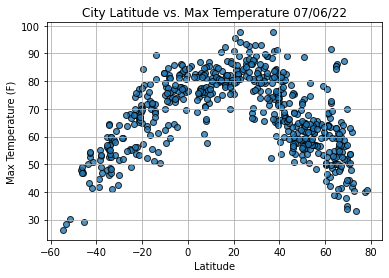

In [17]:
# Import time module

import time


# Build the scatter plot for latitude vs. max temperature

plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties

plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure

plt.savefig("weather_data/Fig1.png")


# Show plot

plt.show()

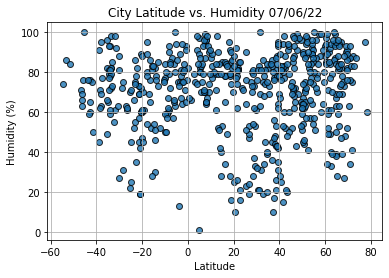

In [18]:
# Build the scatter plots for latitude vs. humidity.

plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure.

plt.savefig("weather_data/Fig2.png")


# Show plot.

plt.show()

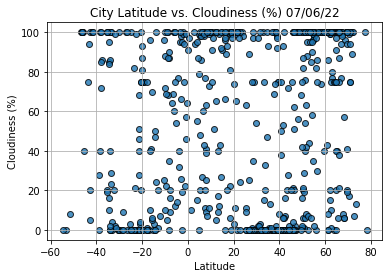

In [19]:
# Build the scatter plots for latitude vs. cloudiness.

plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure.

plt.savefig("weather_data/Fig3.png")


# Show plot.

plt.show()

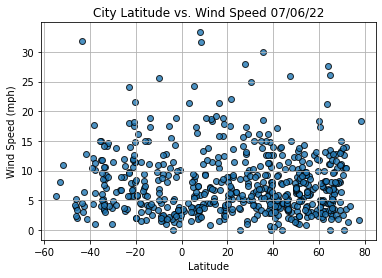

In [20]:
# Build the scatter plots for latitude vs. wind speed.

plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure.

plt.savefig("weather_data/Fig4.png")


# Show plot.

plt.show()

In [21]:
# Import linregress

from scipy.stats import linregress


# Create a function to create linear regression on the weather data and plot a regression line and equation with data

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    
    # Calculate the regression line "y values" from the slope and intercept
    
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
   
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    
    plt.show()

In [22]:
# Create Northern and Southern Hemisphere DataFrames

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

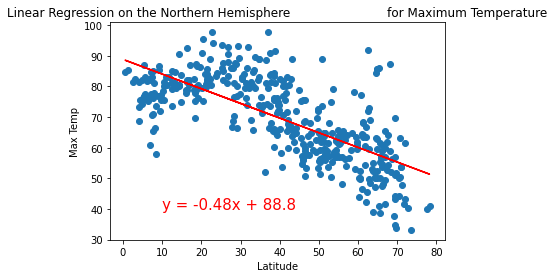

In [23]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]


# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

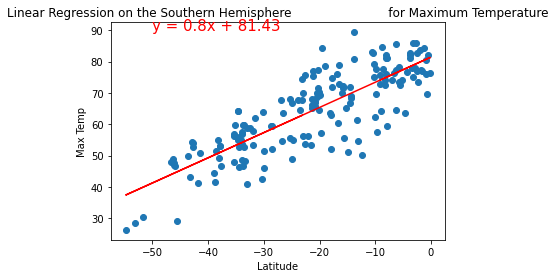

In [24]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]


# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

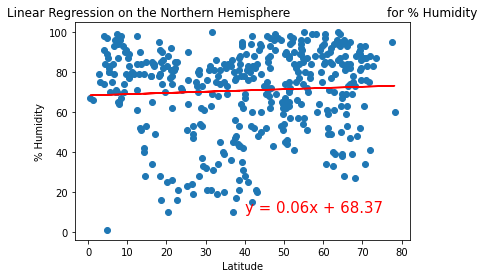

In [25]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]


# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

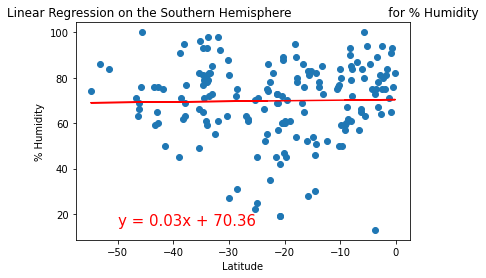

In [26]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]


# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

#### Module 6.4.4 Skilldrill

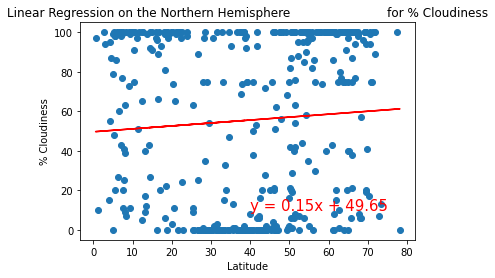

In [27]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]


# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

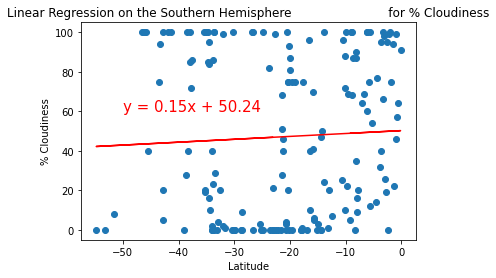

In [28]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]


# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

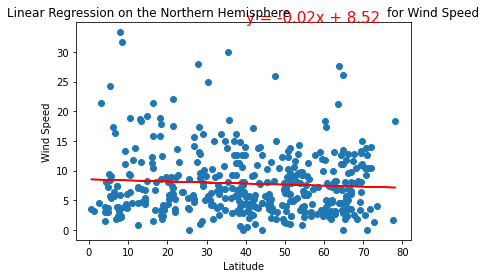

In [29]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]


# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

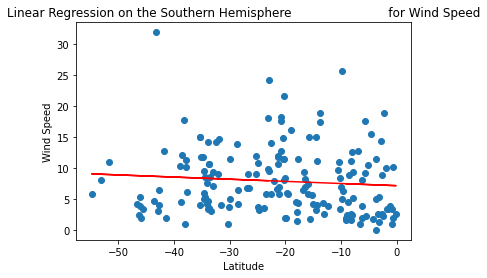

In [30]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]


# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))